In [1]:
# Tratamiento de datos
import pandas as pd 
pd.set_option("display.max_columns", None)

# Exploración de archivos
import sys
sys.path.append('../') # necesito esto para la siguiente línea de código; para que busque src en una carpeta anterior

# Funciones personalizadas
from src import sp_abtesting as sab

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
import scipy.stats as stats

In [2]:
df = pd.read_csv("../data/data_limpios_nonulos.csv")

In [3]:
df.sample(3)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_knn
1636,1637,a,2022-03-20,0,sports,1046,tennis_racket,0,0.00,0.0,no_conversion,no_conversion,central,47.0,f,tablet,23,no_conversion,other,social,no,144.30
1838,1839,b,2022-03-18,0,beauty,1096,perfume,0,0.19,0.0,no_conversion,no_conversion,north,24.0,m,desktop,19,no_conversion,chrome,paid,no,88.93
1453,1454,b,2022-03-28,0,toys,1001,action_figure,0,0.15,0.0,no_conversion,no_conversion,north,57.0,f,tablet,14,no_conversion,firefox,social,no,97.77


In [4]:
df['group'].unique()

array(['a', 'b'], dtype=object)

In [5]:
sab.exploracion_df_abtest(df, 'group')

Los principales estadísticos de las columnas categóricas para el grupo A son:


,count,unique,top,freq
group,987,1,a,987
visit_date,987,90,2022-01-19,19
product_category,987,7,fashion,165
product_name,987,28,jeans,49
payment_method,987,5,no_conversion,886
shipping_method,987,4,no_conversion,886
region,987,5,south,225
customer_gender,987,3,f,492
device,987,3,tablet,354
coupon_used,987,3,no_conversion,886


Los principales estadísticos de las columnas numéricas para el grupo A son:


,count,mean,std,min,25%,50%,75%,max
user_id,987.0,999.448835,576.199597,1.00,518.500,983.000000,1498.50,2000.00
conversion,987.0,0.102330,0.303236,0.00,0.000,0.000000,0.00,1.00
product_id,987.0,1498.579534,293.157734,1001.00,1248.000,1495.000000,1754.50,1998.00
quantity,987.0,0.291793,0.972212,0.00,0.000,0.000000,0.00,5.00
discount,987.0,0.152396,0.085578,0.00,0.080,0.150224,0.23,0.30
total_value,987.0,41.642280,218.045865,0.00,0.000,0.000000,0.00,2899.50
customer_age,987.0,43.584600,15.263729,18.00,30.500,42.000000,56.00,70.00
session_duration,987.0,15.721378,8.697904,1.00,8.000,16.000000,23.00,30.00
price_knn,987.0,182.785984,209.210432,5.02,47.435,99.950000,232.75,998.88


-------------------------------------------------------------
Los principales estadísticos de las columnas categóricas para el grupo B son:


,count,unique,top,freq
group,1013,1,b,1013
visit_date,1013,90,2022-01-28,22
product_category,1013,7,fashion,156
product_name,1013,28,science_fiction,58
payment_method,1013,5,no_conversion,867
shipping_method,1013,4,no_conversion,867
region,1013,5,east,217
customer_gender,1013,3,f,505
device,1013,3,mobile,357
coupon_used,1013,3,no_conversion,867


Los principales estadísticos de las columnas numéricas para el grupo B son:


,count,mean,std,min,25%,50%,75%,max
user_id,1013.0,1001.524186,579.036318,2.00,489.00,1015.00,1501.00,1997.00
conversion,1013.0,0.144126,0.351391,0.00,0.00,0.00,0.00,1.00
product_id,1013.0,1504.463968,281.364999,1000.00,1266.00,1527.00,1736.00,1997.00
quantity,1013.0,0.448174,1.200514,0.00,0.00,0.00,0.00,5.00
discount,1013.0,0.148109,0.085847,0.00,0.07,0.15,0.22,0.30
total_value,1013.0,61.607828,249.343541,0.00,0.00,0.00,0.00,2904.07
customer_age,1013.0,42.693978,15.148251,18.00,29.00,42.00,56.00,70.00
session_duration,1013.0,15.547878,8.690150,1.00,8.00,16.00,23.00,30.00
price_knn,1013.0,186.312447,210.559922,5.34,45.85,111.97,230.83,995.65


-------------------------------------------------------------


Cuando ahcemos un ab tetsing, nos interesa que haya el mismo número en ambos grupos pero aquí no sucede así. Sin embargo, como se ve a continuación es casi el mismo porcentaje por lo que no hay diferencias significativas.

In [6]:
df['group'].value_counts()/df.shape[0]*100

group
b    50.65
a    49.35
Name: count, dtype: float64

## Métricas a estudiar:
- conversion
- total_value
- session_duration
- quantity

Text(0.5, 1.0, 'Cantidad')

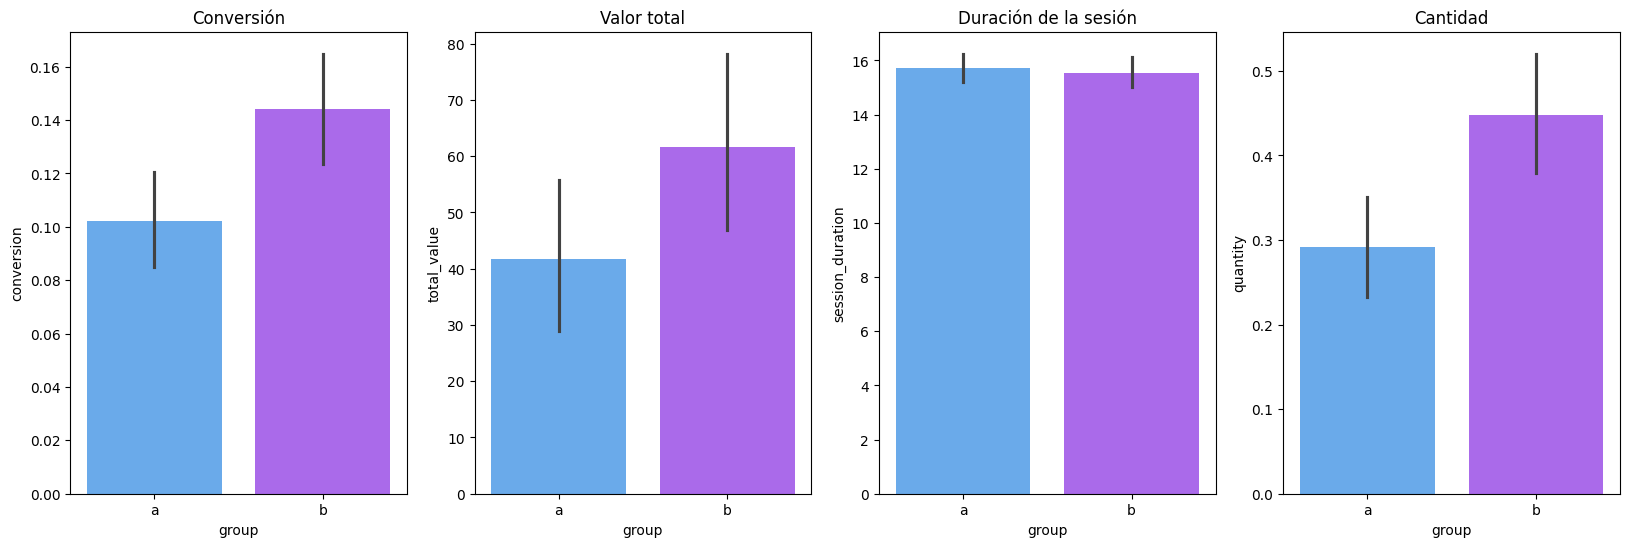

In [7]:
fig, axes= plt.subplots(nrows=1, ncols=4, figsize= (20,6))

sns.barplot(x='group', y='conversion', data=df, ax=axes[0], hue='group', palette='cool' )
axes[0].set_title('Conversión')
sns.barplot(x='group', y='total_value', data=df, ax=axes[1], hue='group', palette='cool' )
axes[1].set_title('Valor total')
sns.barplot(x='group', y='session_duration', data=df, ax=axes[2], hue='group', palette='cool' )
axes[2].set_title('Duración de la sesión')
sns.barplot(x='group', y='quantity', data=df, ax=axes[3], hue='group', palette='cool' )
axes[3].set_title('Cantidad')

Lo primero a comprobar es si nuestros datos siguen una distribución normal

In [8]:
metricas = ['conversion', 'total_value', 'session_duration','quantity']

In [9]:
stats.shapiro(df['conversion'])

ShapiroResult(statistic=np.float64(0.3848438876975814), pvalue=np.float64(2.033580017265307e-63))

In [10]:
def normalidad(df, lista_metricas):
  for metrica in lista_metricas:
    statistic, p_value = stats.shapiro(df[metrica]) 
    if p_value > 0.05 :
      print(f'Para la columna {metrica.upper()} los datos SÍ siguen una distribución normal')
    else: 
      print(f'Para la columna {metrica.upper()} los datos NO siguen una distribución normal')

In [11]:
normalidad(df, metricas)

Para la columna CONVERSION los datos NO siguen una distribución normal
Para la columna TOTAL_VALUE los datos NO siguen una distribución normal
Para la columna SESSION_DURATION los datos NO siguen una distribución normal
Para la columna QUANTITY los datos NO siguen una distribución normal


Lo segundo es la homocedasticidad

In [12]:
sab.homocedasticidad(df, 'group', metricas)

Para la columna CONVERSION las varianzas  NO son homogéneas, es decir, NO hay homocedasticidad 
Para la columna TOTAL_VALUE las varianzas son homogéneas, es decir, SÍ hay homocedasticidad 
Para la columna SESSION_DURATION las varianzas son homogéneas, es decir, SÍ hay homocedasticidad 
Para la columna QUANTITY las varianzas  NO son homogéneas, es decir, NO hay homocedasticidad 


TEST DE MANN WHITHNEY porque los datos no son normales

In [14]:
sab.mannwhitneyu(df, 'group', metricas )

Para la métrica CONVERSION las medianas son distintas, es decir, SÍ hay diferencias significativas entre los grupos
Para la métrica TOTAL_VALUE las medianas son distintas, es decir, SÍ hay diferencias significativas entre los grupos
Para la métrica SESSION_DURATION las medianas son iguales, es decir, NO hay diferencias significativas entre los grupos
Para la métrica QUANTITY las medianas son distintas, es decir, SÍ hay diferencias significativas entre los grupos
